In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# om output te tonen
import matplotlib.pyplot as plt
import os
import time


# Dataset binnenhalen

Om Alexnet te trainen gebruiken we een kant en klare database van images: **keras.datasets** refereert naar ingebouwde datasets, die kunnen we laden.

We gebruiken CIFAR database, zie de webpagina voor meer info: https://www.cs.toronto.edu/%7Ekriz/cifar.htmlEen .

Deze dataset bevat 50.000 32x32 (kleuren) afbeeldingen om te trainen en 10.000 on te testen. Data heeft 10 categorien.

Call naar db retourneert een Tuple van NumPy arrays: (x_train, y_train), (x_test, y_test).


In [ ]:
#x_train(en x_test): een NumPy array met pixel data.
# pixel waardes zijn grijswaardes van elk kanaal (R, G, B), dus 3 in totaal
# de afbeelding is een matrix van 32 bij 32 pixels.
# de vorm van de numpyarray is dus (aantal, 32, 32, 3)
# aantal is 50000 voor de training set en 10000 voor de test set

#y_train (en y_test): een numPy array met labels data, labels zijn in de gerepresenteerd als een integer en lopen van 0-9
# de vorm van de array is dus (aantal, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

Data is gelabeld op 10 categroieen (zie ook [Keras documentatie](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data))

In [ ]:

# we gebruiken tf.data.Dataset als een manier om met (veel) data te kunnen werken.
# aan tf.data.Dataset zit ook een API aan vast die pipeline opbouwen makkelijker maakt.
# het is heel makkelijk om een tensor in te laden (uit bijvoorbeeld een lijst/array)

dataset_train=tf.data.Dataset.from_tensor_slices((x_train,y_train))
dataset_test=tf.data.Dataset.from_tensor_slices((x_test,y_test))

De images zijn nu als het goed is geladen. We tonen nu elkele images op het scherm.


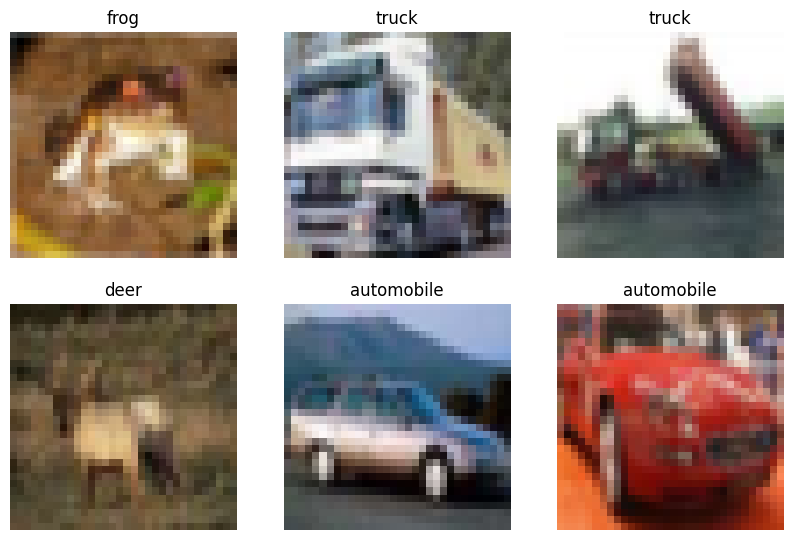

In [ ]:

# we maken een lijst van strings die overheenkomen met de labels om deze te kunnen printen (ipv getallen)
class_names= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
i = 0

#show 6 images from dataset
for image, label in dataset_train.take(6):
    ax = plt.subplot(3, 3, i+ 1)
    plt.imshow(image)
    plt.title(class_names[label[0]])
    i = i+1
    plt.axis("off")



# Preprocessing stap

Elke image in de dataset moet op dezelfde manier worden voorbereid om vergeleken kunnen te worden.

Zo willen we de waardes niet niet als integers van 0 tot 255 hebben, maar als float en 0 als mean. Om dit te bereiken heeft keras **per_image_standardization** functie: *Linearly scales each image in image to have mean 0 and variance 1*.

Een andere belangerijke voorwaarde is dat alle images even groot zijn qua afmetingen. Daarom doen we de **resize** functie met bijv 64 bij 64


In [ ]:
#preprocess an image - bring to standart format

def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))

    return image,label
















Data Pipeline

In [ ]:
#WIP